In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import calendar
from pylab import rcParams

In [23]:
df = pd.read_csv("Rose.csv", parse_dates=['YearMonth'], index_col='YearMonth')

In [24]:
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [25]:
df.dtypes

Rose    float64
dtype: object

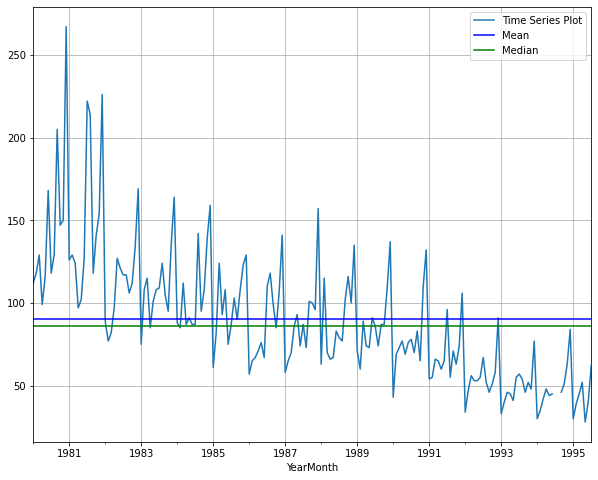

In [26]:
rcParams['figure.figsize'] = 10, 8
df['Rose'].plot()
plt.axhline(df['Rose'].mean(),color='Blue')
plt.axhline(df['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);
plt.show()

In [27]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


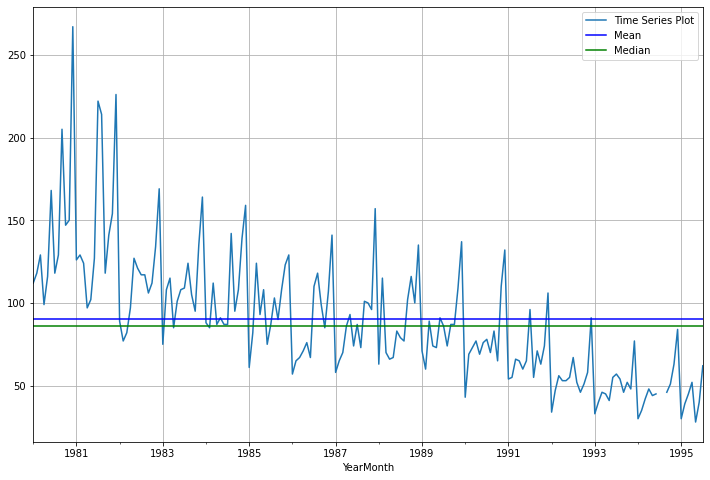

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df['Rose'].plot()
plt.axhline(df['Rose'].mean(),color='Blue')
plt.axhline(df['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);
plt.show()

In [29]:
df['Rose'].isnull().sum()

2

In [30]:
df.fillna(method='bfill', inplace = True)
df['Rose'].isnull().sum()

0

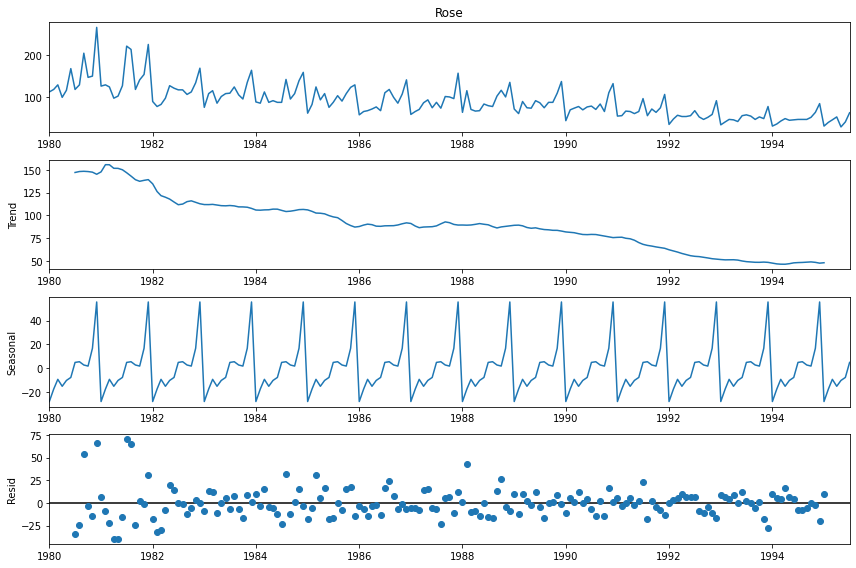

In [31]:
df_add_decompose = seasonal_decompose(df['Rose'],model = 'additive', period=12)
df_add_decompose.plot()
plt.show()

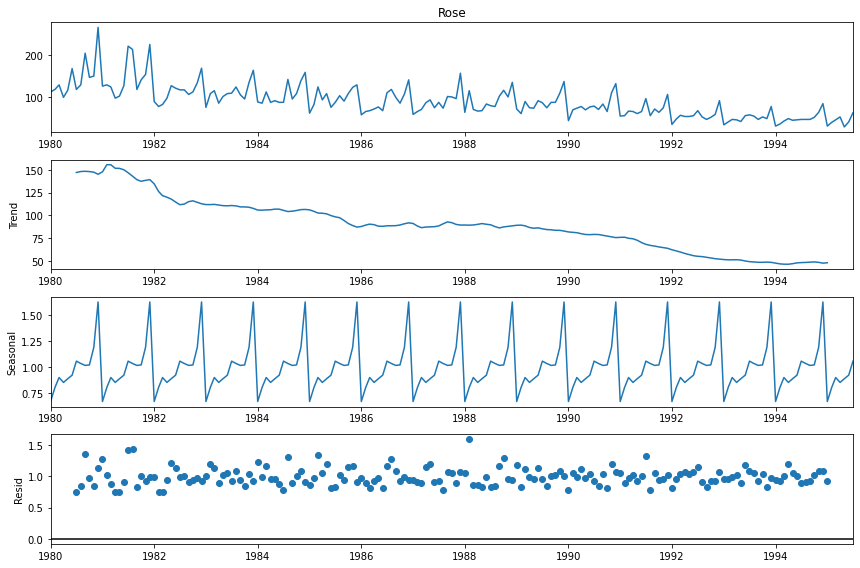

In [32]:
df_multi_decompose = seasonal_decompose(df['Rose'], model='multiplicative', period = 12)
df_multi_decompose.plot()
plt.show()

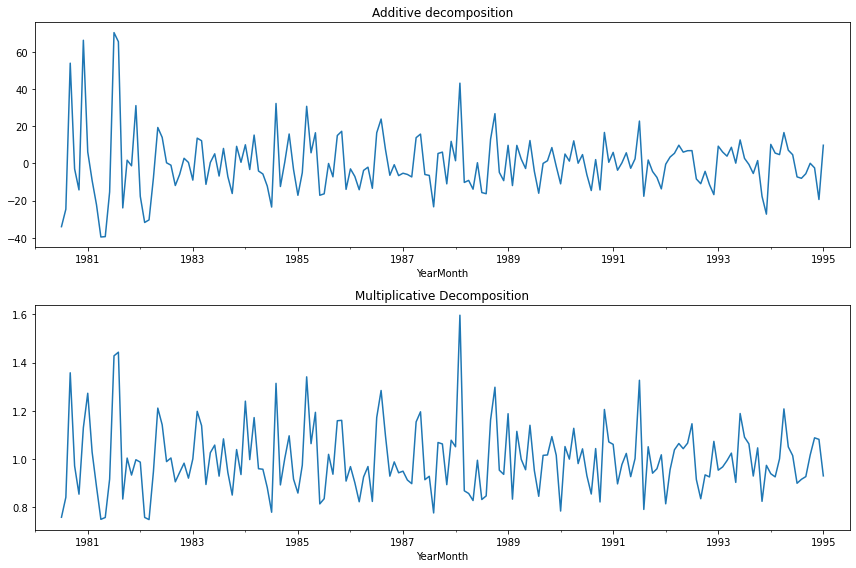

In [33]:
plt.subplot(2,1,1)
plt.title('Additive decomposition')
df_add_decompose.resid.plot()


plt.subplot(2,1,2)
plt.title('Multiplicative Decomposition')
df_multi_decompose.resid.plot()
plt.tight_layout()
plt.show()

In [34]:
df['Month'] = df.index.month
df['Year'] = df.index.year

In [35]:
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df.head()

,Rose,Month,Year
YearMonth,,,
1980-01-01,112.0,Jan,1980
1980-02-01,118.0,Feb,1980
1980-03-01,129.0,Mar,1980
1980-04-01,99.0,Apr,1980
1980-05-01,116.0,May,1980


### YEARLY BOXPLOT

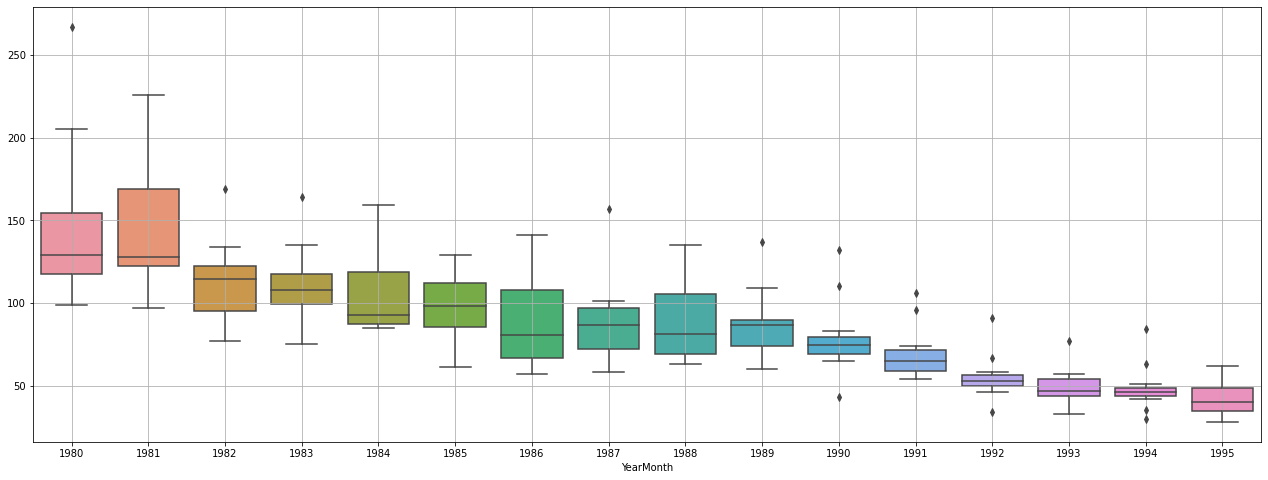

In [36]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

### MONTHLY BOXPLOT

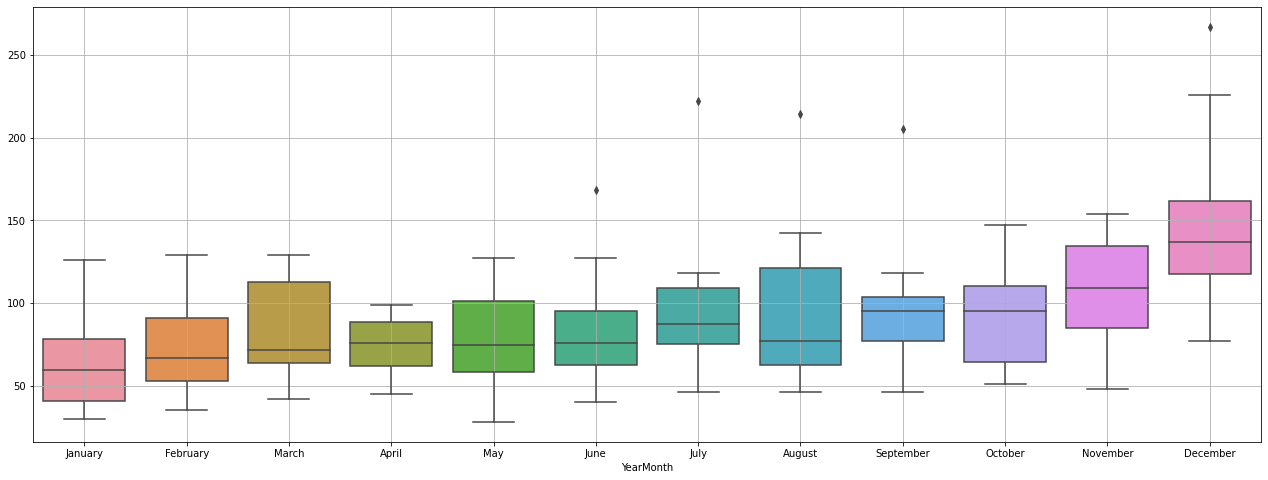

In [37]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [40]:
df.head()

,Rose,Month,Year
YearMonth,,,
1980-01-01,112.0,Jan,1980
1980-02-01,118.0,Feb,1980
1980-03-01,129.0,Mar,1980
1980-04-01,99.0,Apr,1980
1980-05-01,116.0,May,1980


## SPLIT THE DATA

In [41]:
test = df['01-01-1991':]
train = df[:'01-01-1991']

In [43]:
train.head()

,Rose,Month,Year
YearMonth,,,
1980-01-01,112.0,Jan,1980
1980-02-01,118.0,Feb,1980
1980-03-01,129.0,Mar,1980
1980-04-01,99.0,Apr,1980
1980-05-01,116.0,May,1980


In [44]:
print(train.shape)
print(test.shape)

(133, 3)
(55, 3)


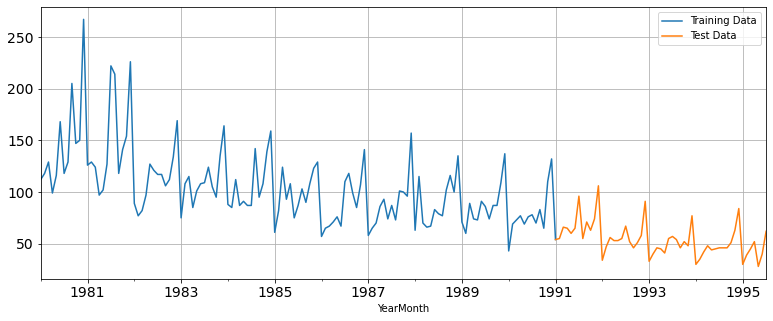

In [45]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [46]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+134 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]
Test Time instance 
 [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188]


## LINEAR REGRESSION

In [47]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [48]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [51]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [52]:
from sklearn import metrics

In [53]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 14.935


In [54]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,14.934579


In [55]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [56]:
SES_train = train.copy()
SES_test = test.copy()

In [57]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [58]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [59]:
model_SES_autofit.params

{'smoothing_level': 0.09764588980510863,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.41619408114488,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [60]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2

1991-02-01    83.845231
1991-03-01    83.845231
1991-04-01    83.845231
1991-05-01    83.845231
1991-06-01    83.845231
1991-07-01    83.845231
1991-08-01    83.845231
1991-09-01    83.845231
1991-10-01    83.845231
1991-11-01    83.845231
1991-12-01    83.845231
1992-01-01    83.845231
1992-02-01    83.845231
1992-03-01    83.845231
1992-04-01    83.845231
1992-05-01    83.845231
1992-06-01    83.845231
1992-07-01    83.845231
1992-08-01    83.845231
1992-09-01    83.845231
1992-10-01    83.845231
1992-11-01    83.845231
1992-12-01    83.845231
1993-01-01    83.845231
1993-02-01    83.845231
1993-03-01    83.845231
1993-04-01    83.845231
1993-05-01    83.845231
1993-06-01    83.845231
1993-07-01    83.845231
1993-08-01    83.845231
1993-09-01    83.845231
1993-10-01    83.845231
1993-11-01    83.845231
1993-12-01    83.845231
1994-01-01    83.845231
1994-02-01    83.845231
1994-03-01    83.845231
1994-04-01    83.845231
1994-05-01    83.845231
1994-06-01    83.845231
1994-07-01    83

In [61]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 33.859


In [62]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=0.0976:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,14.934579
Alpha=0.0976:SimpleExponentialSmoothing,33.858909


In [63]:
DES_train = train.copy()
DES_test = test.copy()

In [64]:
model_DES = Holt(SES_train['Rose'])

In [65]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [66]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,9.098504e-07,True
smoothing_trend,beta,1.841243e-08,True
initial_level,l.0,1.380863e+02,True
initial_trend,b.0,-5.003917e-01,True


In [67]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3

1991-02-01    71.033845
1991-03-01    70.533453
1991-04-01    70.033061
1991-05-01    69.532669
1991-06-01    69.032278
1991-07-01    68.531886
1991-08-01    68.031494
1991-09-01    67.531103
1991-10-01    67.030711
1991-11-01    66.530319
1991-12-01    66.029927
1992-01-01    65.529536
1992-02-01    65.029144
1992-03-01    64.528752
1992-04-01    64.028360
1992-05-01    63.527969
1992-06-01    63.027577
1992-07-01    62.527185
1992-08-01    62.026794
1992-09-01    61.526402
1992-10-01    61.026010
1992-11-01    60.525618
1992-12-01    60.025227
1993-01-01    59.524835
1993-02-01    59.024443
1993-03-01    58.524051
1993-04-01    58.023660
1993-05-01    57.523268
1993-06-01    57.022876
1993-07-01    56.522485
1993-08-01    56.022093
1993-09-01    55.521701
1993-10-01    55.021309
1993-11-01    54.520918
1993-12-01    54.020526
1994-01-01    53.520134
1994-02-01    53.019742
1994-03-01    52.519351
1994-04-01    52.018959
1994-05-01    51.518567
1994-06-01    51.018176
1994-07-01    50

In [70]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 14.937


In [71]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,14.934579
Alpha=0.0976:SimpleExponentialSmoothing,33.858909
"Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing",14.936916


In [72]:
TES_train = train.copy()
TES_test = test.copy()

In [73]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='multiplicative',seasonal='multiplicative')

In [74]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [75]:
model_TES_autofit.params

{'smoothing_level': 0.075736443908668,
 'smoothing_trend': 0.054095230994916865,
 'smoothing_seasonal': 0.41076802008127705,
 'damping_trend': nan,
 'initial_level': 74.76302257024037,
 'initial_trend': 1.0063884869742872,
 'initial_seasons': array([1.64424724, 1.71000839, 1.80391887, 1.56482856, 1.74024994,
        2.24741506, 2.19948312, 2.28667059, 2.74243282, 2.03538837,
        2.19031921, 3.57179474]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4

1991-02-01     66.904608
1991-03-01     70.775426
1991-04-01     68.492129
1991-05-01     66.272064
1991-06-01     72.638237
1991-07-01     74.695808
1991-08-01     69.280776
1991-09-01     81.059757
1991-10-01     75.543997
1991-11-01     98.503516
1991-12-01    124.071024
1992-01-01     48.578117
1992-02-01     63.999124
1992-03-01     67.701843
1992-04-01     65.517702
1992-05-01     63.394050
1992-06-01     69.483756
1992-07-01     71.451973
1992-08-01     66.272101
1992-09-01     77.539552
1992-10-01     72.263328
1992-11-01     94.225778
1992-12-01    118.682958
1993-01-01     46.468502
1993-02-01     61.219816
1993-03-01     64.761736
1993-04-01     62.672447
1993-05-01     60.641019
1993-06-01     66.466266
1993-07-01     68.349009
1993-08-01     63.394085
1993-09-01     74.172221
1993-10-01     69.125129
1993-11-01     90.133809
1993-12-01    113.528881
1994-01-01     44.450502
1994-02-01     58.561207
1994-03-01     61.949311
1994-04-01     59.950754
1994-05-01     58.007545


In [77]:
rmse_model4_test = metrics.mean_squared_error(test['Rose'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 27.814


In [78]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.07575,Beta=0.0541,Gamma=0.4107:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,14.934579
Alpha=0.0976:SimpleExponentialSmoothing,33.858909
"Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing",14.936916
"Alpha=0.07575,Beta=0.0541,Gamma=0.4107:TripleExponentialSmoothing",27.813988


In [79]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [80]:
train.tail()

,Rose,Month,Year
YearMonth,,,
1990-09-01,83.0,Sep,1990
1990-10-01,65.0,Oct,1990
1990-11-01,110.0,Nov,1990
1990-12-01,132.0,Dec,1990
1991-01-01,54.0,Jan,1991


In [81]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    54.0
1991-02-01    54.0
1991-03-01    54.0
1991-04-01    54.0
1991-05-01    54.0
Name: naive, dtype: float64

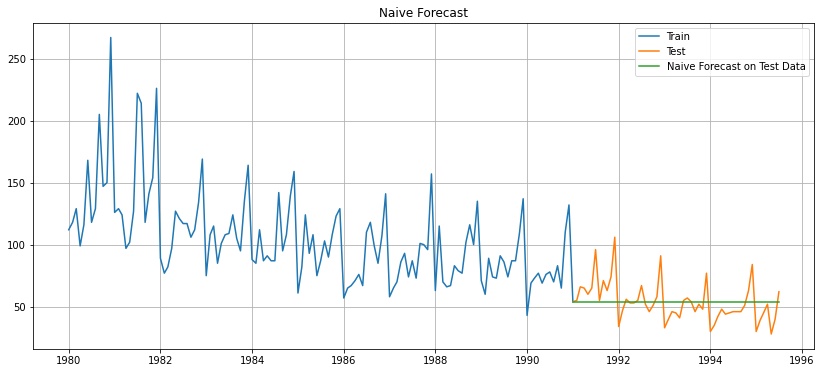

In [82]:
plt.subplots(figsize=(14,6))

plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [83]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive Bayes forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive Bayes forecast on the Test Data,  RMSE is 15.751


In [84]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,14.934579
Alpha=0.0976:SimpleExponentialSmoothing,33.858909
"Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing",14.936916
"Alpha=0.07575,Beta=0.0541,Gamma=0.4107:TripleExponentialSmoothing",27.813988
NaiveModel,15.750902


In [85]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [86]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,Month,Year,mean_forecast
YearMonth,,,,
1991-01-01,54.0,Jan,1991,104.556391
1991-02-01,55.0,Feb,1991,104.556391
1991-03-01,66.0,Mar,1991,104.556391
1991-04-01,65.0,Apr,1991,104.556391
1991-05-01,60.0,May,1991,104.556391


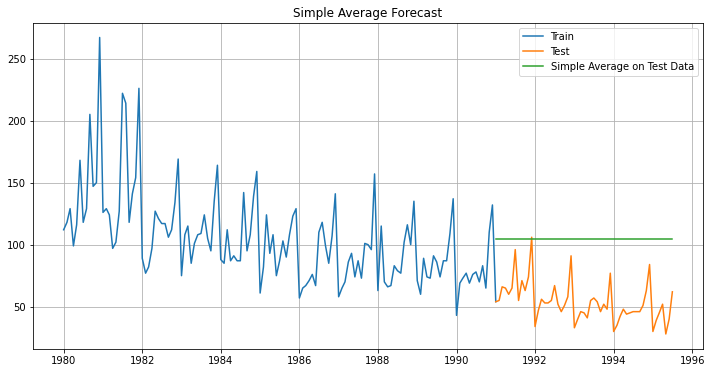

In [87]:
plt.subplots(figsize=(12,6))

plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [88]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.075


In [89]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,14.934579
Alpha=0.0976:SimpleExponentialSmoothing,33.858909
"Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing",14.936916
"Alpha=0.07575,Beta=0.0541,Gamma=0.4107:TripleExponentialSmoothing",27.813988
NaiveModel,15.750902
SimpleAverageModel,53.074556


In [90]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose,Month,Year
YearMonth,,,
1980-01-01,112.0,Jan,1980
1980-02-01,118.0,Feb,1980
1980-03-01,129.0,Mar,1980
1980-04-01,99.0,Apr,1980
1980-05-01,116.0,May,1980


In [91]:
MovingAverage['Trailing_3'] = MovingAverage['Rose'].rolling(3).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage['Trailing_12'] = MovingAverage['Rose'].rolling(12).mean()

MovingAverage.head()

,Rose,Month,Year,Trailing_3,Trailing_6,Trailing_9,Trailing_12
YearMonth,,,,,,,
1980-01-01,112.0,Jan,1980,NaN,NaN,NaN,NaN
1980-02-01,118.0,Feb,1980,NaN,NaN,NaN,NaN
1980-03-01,129.0,Mar,1980,119.666667,NaN,NaN,NaN
1980-04-01,99.0,Apr,1980,115.333333,NaN,NaN,NaN
1980-05-01,116.0,May,1980,114.666667,NaN,NaN,NaN


In [92]:
MovingAverage.shape

(187, 7)

In [93]:
df.shape

(187, 3)

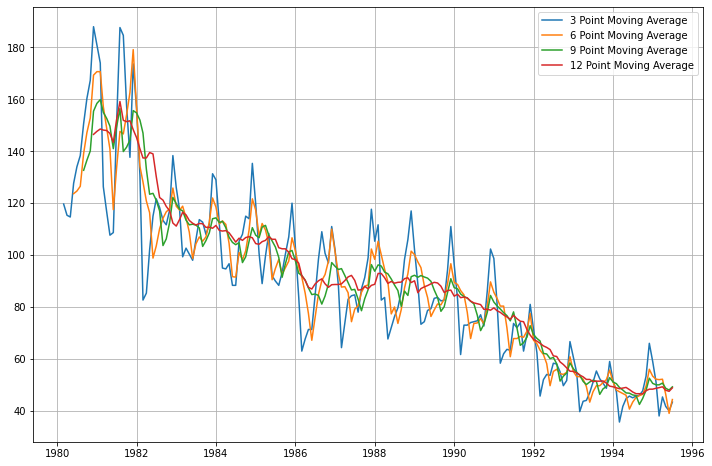

In [94]:
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.plot(MovingAverage['Trailing_12'],label = '12 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [95]:
trailing_MovingAverage_train=MovingAverage[0:len(train)] 
trailing_MovingAverage_test=MovingAverage[len(train)-1:]

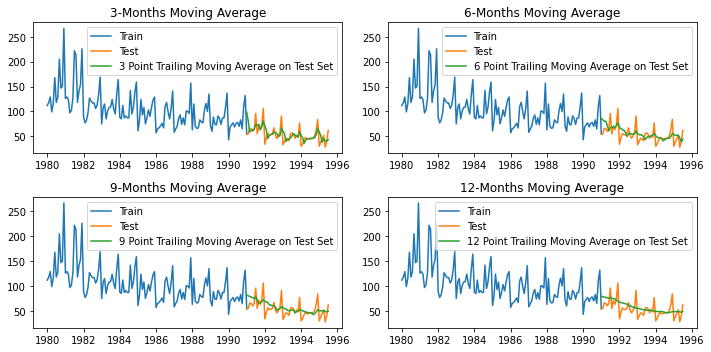

In [96]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(10)
fig.set_figheight(5)

axes[0][0].plot(trailing_MovingAverage_train['Rose'], label='Train')
axes[0][0].plot(trailing_MovingAverage_test['Rose'], label='Test')

axes[0][0].plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
axes[0][0].set_title("3-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(trailing_MovingAverage_train['Rose'], label='Train')
axes[0][1].plot(trailing_MovingAverage_test['Rose'], label='Test')

axes[0][1].plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Test Set')
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(trailing_MovingAverage_train['Rose'], label='Train')
axes[1][0].plot(trailing_MovingAverage_test['Rose'], label='Test')

axes[1][0].plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
axes[1][0].set_title("9-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(trailing_MovingAverage_train['Rose'], label='Train')
axes[1][1].plot(trailing_MovingAverage_test['Rose'], label='Test')

axes[1][1].plot(trailing_MovingAverage_test['Trailing_12'],label = '12 Point Trailing Moving Average on Test Set')
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()

In [97]:
## Test Data - RMSE  - 3 point Trailing MA

rmse_model4_test_3 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_3'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_3))

## Test Data - RMSE - 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE - 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

## Test Data - RMSE - 12 point Trailing MA

rmse_model4_test_12 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_12'],squared=False)
print("For 12 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_12))

For 3 point Moving Average Model forecast on the Training Data,  RMSE is 14.126
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.560
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.725
For 12 point Moving Average Model forecast on the Training Data,  RMSE is 15.234


In [98]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_3,rmse_model4_test_6
                                          ,rmse_model4_test_9,rmse_model4_test_12]}
                           ,index=['3pointTrailingMovingAverage','6pointTrailingMovingAverage'
                                   ,'9pointTrailingMovingAverage','12pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,14.934579
Alpha=0.0976:SimpleExponentialSmoothing,33.858909
"Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing",14.936916
"Alpha=0.07575,Beta=0.0541,Gamma=0.4107:TripleExponentialSmoothing",27.813988
NaiveModel,15.750902
SimpleAverageModel,53.074556
3pointTrailingMovingAverage,14.126413
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
12pointTrailingMovingAverage,15.234402


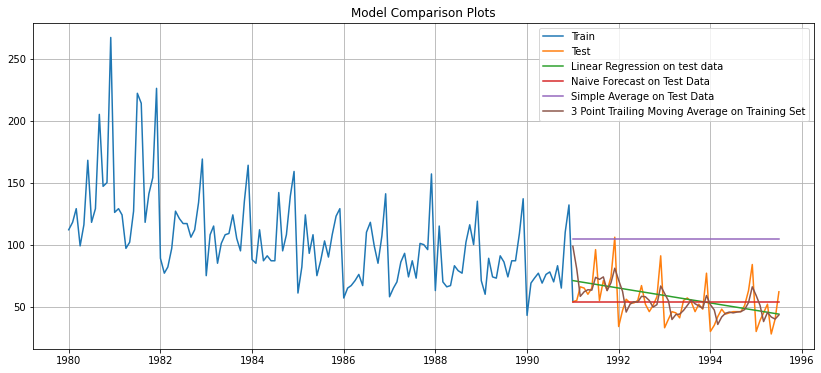

In [99]:
plt.subplots(figsize = (14,6))

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression on test data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## ARIMA MODEL

In [100]:
import sys
import itertools

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
dftest = adfuller(df['Rose'])
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.877
DF test p-value is 0.3427


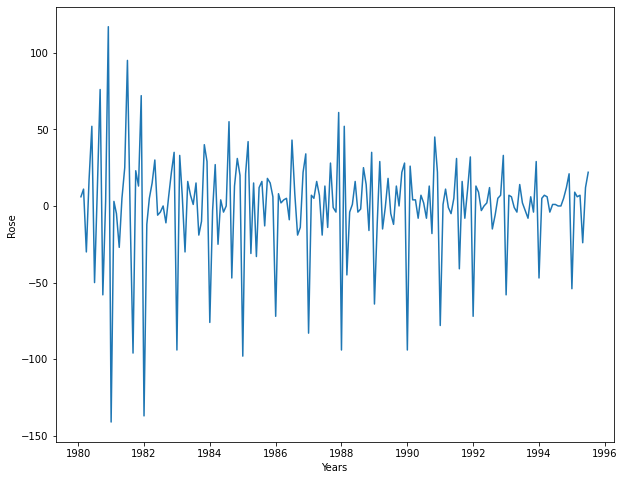

In [102]:
plt.figure(figsize=(10, 8))
plt.plot(df['Rose'].diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Rose');

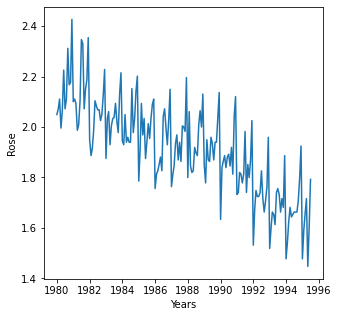

In [103]:
plt.figure(figsize=(5, 5))
plt.plot(np.log10(df['Rose']))
plt.xlabel('Years')
plt.ylabel('Rose');

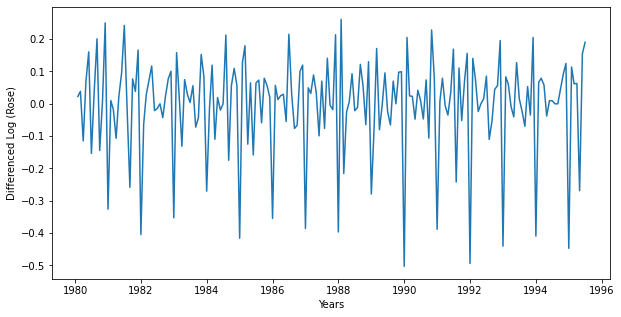

In [104]:
sales_ts = df['Rose']
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Rose)');


In [105]:
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)

sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)

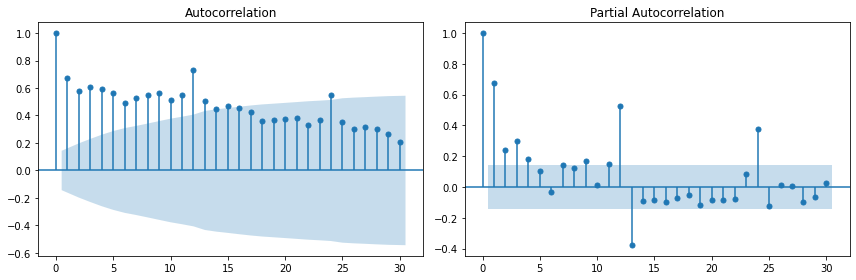

In [106]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log, lags=30, ax=axes[1])
plt.tight_layout()

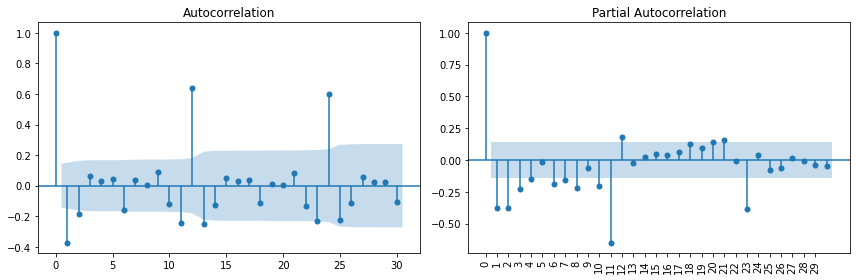

In [107]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
plt.xticks(range(0,30,1), rotation = 90)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

In [108]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [109]:
df['date'] = df.index
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']
train_sales_ts_log = np.log10(train['Rose'])

In [110]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [111]:
for param in pdq:#looping through the (p,d,q) values for ARIMA
    for param_seasonal in seasonal_pdq:#looping through the (P,D,Q,freq) values for SARIMA
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log_diff,#defining the SARIMA model after taking
                                                   # the logarithm of the training data
                                             order = param,#setting the (p,d,q) values
                                             seasonal_order = param_seasonal,#setting the (P,D,Q,freq) values
                                             enforce_stationarity=True)
            results = temp_model.fit()#fitting the above built SARIMA model

            
            if results.aic < best_aic:#defining a conditional statement about whether the AIC of the model
                #just built is less than the best_aic
                best_aic = results.aic#defining the new value of AIC from the SARIMA model as the best_aic
                best_pdq = param#storing the (p,d,q) values in the variable best_pdq
                best_seasonal_pdq = param_seasonal#storing the (P,D,Q,freq) values in the variable 
                #best_seasonal_pdq
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 model - AIC:-418.42274111137476


In [112]:
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(0, 0, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [113]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 154.442
Date:                            Tue, 13 Jul 2021   AIC                           -300.883
Time:                                    19:00:45   BIC                           -287.959
Sample:                                01-01-1980   HQIC                          -295.646
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3872      0.072      5.400      0.000       0.247       0.528
ar.S.L12       0.9991      0.001   

In [114]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=True, full_results=True)

In [115]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [116]:
pred99 = best_results.get_forecast(steps=56,alpha=0.1)

In [117]:
print(pred99.predicted_mean)

1995-08-01    1.717762
1995-09-01    1.667263
1995-10-01    1.710586
1995-11-01    1.772757
1995-12-01    1.920056
1996-01-01    1.481548
1996-02-01    1.583035
1996-03-01    1.649030
1996-04-01    1.703170
1996-05-01    1.508523
1996-06-01    1.625785
1996-07-01    1.761768
1996-08-01    1.705046
1996-09-01    1.665682
1996-10-01    1.708964
1996-11-01    1.771076
1996-12-01    1.918236
1997-01-01    1.480143
1997-02-01    1.581534
1997-03-01    1.647466
1997-04-01    1.701555
1997-05-01    1.507093
1997-06-01    1.624244
1997-07-01    1.760097
1997-08-01    1.703430
1997-09-01    1.664102
1997-10-01    1.707344
1997-11-01    1.769397
1997-12-01    1.916417
1998-01-01    1.478740
1998-02-01    1.580034
1998-03-01    1.645904
1998-04-01    1.699942
1998-05-01    1.505664
1998-06-01    1.622704
1998-07-01    1.758428
1998-08-01    1.701814
1998-09-01    1.662524
1998-10-01    1.705725
1998-11-01    1.767719
1998-12-01    1.914600
1999-01-01    1.477338
1999-02-01    1.578536
1999-03-01 

In [118]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean

#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
testCopy=test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [119]:
testCopy.head()

,Rose,Month,Year,date,sales_ts_forecasted
YearMonth,,,,,
1991-01-01,54.0,Jan,1991,1991-01-01,NaN
1991-02-01,55.0,Feb,1991,1991-02-01,NaN
1991-03-01,66.0,Mar,1991,1991-03-01,NaN
1991-04-01,65.0,Apr,1991,1991-04-01,NaN
1991-05-01,60.0,May,1991,1991-05-01,NaN


In [120]:
mse = ((testCopy['Rose'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is nan


In [121]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [round(rmse, 3)]}
                           ,index=['ARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,14.934579
Alpha=0.0976:SimpleExponentialSmoothing,33.858909
"Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing",14.936916
"Alpha=0.07575,Beta=0.0541,Gamma=0.4107:TripleExponentialSmoothing",27.813988
NaiveModel,15.750902
SimpleAverageModel,53.074556
3pointTrailingMovingAverage,14.126413
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
12pointTrailingMovingAverage,15.234402


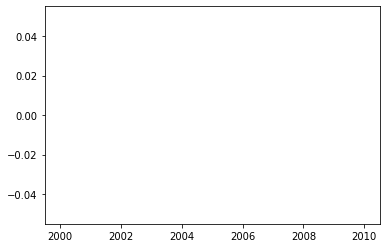

In [122]:
plt.plot(testCopy.sales_ts_forecasted)

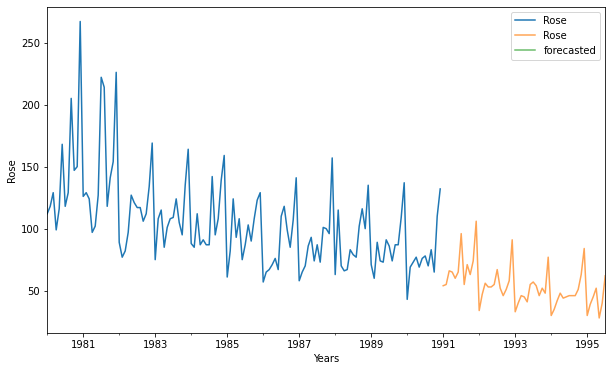

In [123]:
axis = train['Rose'].plot(label='Rose', figsize=(10, 6))
testCopy['Rose'].plot(ax=axis, label='Rose', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()
plt.close()

In [124]:
# Get forecast 12 steps (1 years) ahead in future
n_steps = 12
pred_uc_99 = best_results.get_forecast(steps=12, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
#pred_uc_95 = best_results.get_forecast(steps=12, alpha=0.05) # alpha=0.05 signifies 95% confidence interval

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
#pred_ci_95 = pred_uc_95.conf_int()

In [125]:
n_steps = 12

idx = pd.date_range(df.index[-1], periods=n_steps, freq='MS')#defining the date range for 3 years
#into the future

fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 95% confidence interval

fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                    index=idx, columns=['lower_ci_99', 'upper_ci_99'])#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 99% confidence interval

fc_all = fc_95.combine_first(fc_99)

fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95']]# just reordering 
#columns

fc_all.head(12)

NameError: name 'pred_ci_99' is not defined